In [14]:
"""
cerate on 2020.4.26
by ljz to 2DQPCA_addthreshold
"""
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer,BasicAer,IBMQ,QuantumRegister,ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-05-24 09:45:41,933: Credentials are already in use. The existing account in the session will be replaced.


In [15]:
import numpy as np
A = np.array([[1.5,0.5],[0.5,1.5]])
lambda1,vector1 = np.linalg.eig(A)
u1 = vector1[:,0]
u2 = vector1[:,1]
v1 = lambda1[0]
v2 = lambda1[1]
print("lambda=",lambda1)
print("v1=",v1)
print("v2=",v2)
print("vector=",vector1)
print("u1=",u1)
print("u2=",u2)

psi = (np.kron(u1,u1)*v1+np.kron(u2,u2)*v2)/(np.sqrt(v1*v1+v2*v2))
print("psi=",psi)

lambda= [2. 1.]
v1= 2.0
v2= 1.0
vector= [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
u1= [0.70710678 0.70710678]
u2= [-0.70710678  0.70710678]
psi= [0.67082039 0.2236068  0.2236068  0.67082039]


In [16]:
q = QuantumRegister(5)
c = ClassicalRegister(5)
qc = QuantumCircuit(q,c)

#initial q[0]
qc.initialize(psi,[q[3],q[4]])
qc.barrier(q[0],q[1],q[2],q[3],q[4])

In [17]:
#phase estimation
import math
qc.h(q[1])
qc.h(q[2])
qc.cu3(-math.pi/2,-math.pi/2,math.pi/2,q[2],q[3])
qc.u1(3*math.pi/4,q[2])
qc.cx(q[1],q[3])
qc.swap(q[1],q[2])
qc.h(q[2])
qc.cu1(-math.pi/2,q[1],q[2])
qc.h(q[1])
qc.barrier(q[0],q[1],q[2],q[3],q[4])

In [18]:
#transformation y_k
qc.x(q[2])
qc.cx(q[2],q[1])
qc.barrier(q[0],q[1],q[2],q[3],q[4])

In [19]:
#Anc qubit cont operation
qc.x(q[1])
qc.x(q[2])
qc.ccx(q[1],q[2],q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[0])
qc.barrier(q[0],q[1],q[2],q[3],q[4])

In [20]:
#Reverse operation

# cnot = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
# cnot_ = np.linalg.inv(cnot)
# print(cnot_)cnot=cnot_

#reverse y_k
qc.cx(q[2],q[1])
qc.x(q[2])
#reverse phase estimation
qc.h(q[1])
qc.cu1(math.pi/2,q[1],q[2])
qc.h(q[2])
qc.swap(q[1],q[2])
qc.cx(q[1],q[3])
qc.h(q[1])
qc.u1(-3*math.pi/4,q[2])
qc.cu3(-math.pi/2,math.pi/2,-math.pi/2,q[2],q[3])
qc.h(q[2])
qc.barrier(q[0],q[1],q[2],q[3],q[4])

In [21]:
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])
qc.measure(q[3],c[3])
qc.measure(q[4],c[4])

In [22]:
# qc.draw(output='mpl')

In [23]:
backend_qasm=BasicAer.get_backend('qasm_simulator')
job_qasm=execute(qc,backend_qasm,shots=8192)
result_qasm=job_qasm.result()
counts=result_qasm.get_counts(qc)
print(counts)

sim_jobID=job_qasm.job_id()
print('SIMULATION JOB ID: {}'.format(sim_jobID))

{'00000': 434, '10000': 400, '01001': 1590, '10001': 1670, '11000': 433, '01000': 404, '11001': 1601, '00001': 1660}
SIMULATION JOB ID: d9a0c1f8-ad97-4c91-8dc9-e30927ddc9c1


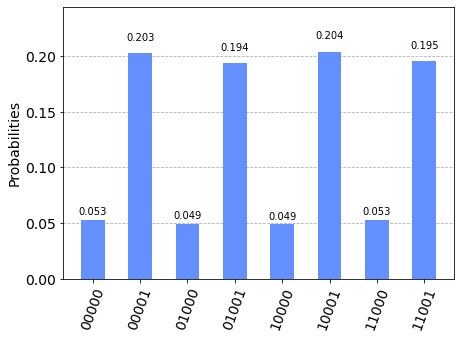

In [24]:
plot_histogram(counts)

In [25]:
psi=np.array([0.67082039,0.2236068,0.2236068,0.67082039])
result_ideal2 = np.array([0.5,0.5,0.5,0.5])
result_ideal1=psi
result_qasm1 = np.array([0.693,0.139,0.139,0.693])
sum1=0.19336+0.21289+0.19824+0.19727
result_qasm2 = np.array([np.sqrt(0.19336/sum1),np.sqrt(0.21289/sum1),np.sqrt(0.19824/sum1),
      np.sqrt(0.19727/sum1)])
accurate = np.dot(result_ideal2,result_qasm2)
print("result_ideal:",result_ideal1)
print("result_qasm:",result_qasm2)
print("accurate:",accurate)

result_ideal: [0.67082039 0.2236068  0.2236068  0.67082039]
result_qasm: [0.49109004 0.51529442 0.49724847 0.49603044]
accurate: 0.9998316825180544


In [26]:
a=np.sqrt(0.17676)
b=np.sqrt(0.17188)
c=np.sqrt(0.16406)
d=np.sqrt(0.17578)
sum2=a+b+c+d
zhi=np.array([np.sqrt(a/sum2),np.sqrt(b/sum2),np.sqrt(c/sum2),np.sqrt(d/sum2)])
print(zhi)
accurate = np.dot(result_ideal2,zhi)
print(accurate)

[0.50336304 0.49985226 0.49406718 0.50266389]
0.9999731867069841
